# GoogleNet 

#### Paper ( https://arxiv.org/pdf/1409.4842.pdf )

#### Summary
- Used 12 x fewer paramaters than architecture around that time and was more accurate 
- CodeNamed **Inception**
- 1 x 1 Conv layers are used a lot for dimensional reduction to limit szize of network while still increasing depth and width without performance penalty.
- Inception modules are created using a combination of some layers 
- Max pooling layers are of stride 2 
- All reduction layers are of relu activations

In [172]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Input, Concatenate, BatchNormalization, AveragePooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow import concat
from tensorflow.keras.utils import plot_model

## Building Blocks

### Inception Block


<center><img src='./Inception_module.png' alt="Alternative text" align="center" /></center>

In [173]:



def inception_module(input, x_1_filters,x_1_filters_3, x_1_filters_5, x_3_filters, x_5_filters, pool_proj):
    x1 = Conv2D(filters=x_1_filters, kernel_size=(1,1), strides=1, activation='relu', padding='same')(input)
    x1_1 = Conv2D(filters=x_1_filters_3, kernel_size=(1,1),strides=1, activation='relu', padding='same')(input)
    x1_2 = Conv2D(filters=x_1_filters_5, kernel_size=(1,1), strides=1, activation='relu', padding='same')(input)
    x1_max = MaxPool2D(pool_size=3, strides=1, padding='same')(input)
    x1_4 = Conv2D(filters=pool_proj, kernel_size=(1,1), strides=1, activation='relu', padding='same')( x1_max)
    x3_3 = Conv2D(filters=x_3_filters, kernel_size=(3,3), strides=1, activation='relu', padding='same')( x1_1)
    x5_5 = Conv2D(filters=x_5_filters, kernel_size=(5,5), strides=1, activation='relu', padding='same')( x1_2)
    return Concatenate()([x1_4, x3_3, x5_5, x1])



In [175]:
input = Input(shape=(224,224,3))
x = inception_module(input, 64,96,16, 128, 32, 32)
inception = Model(input, x)


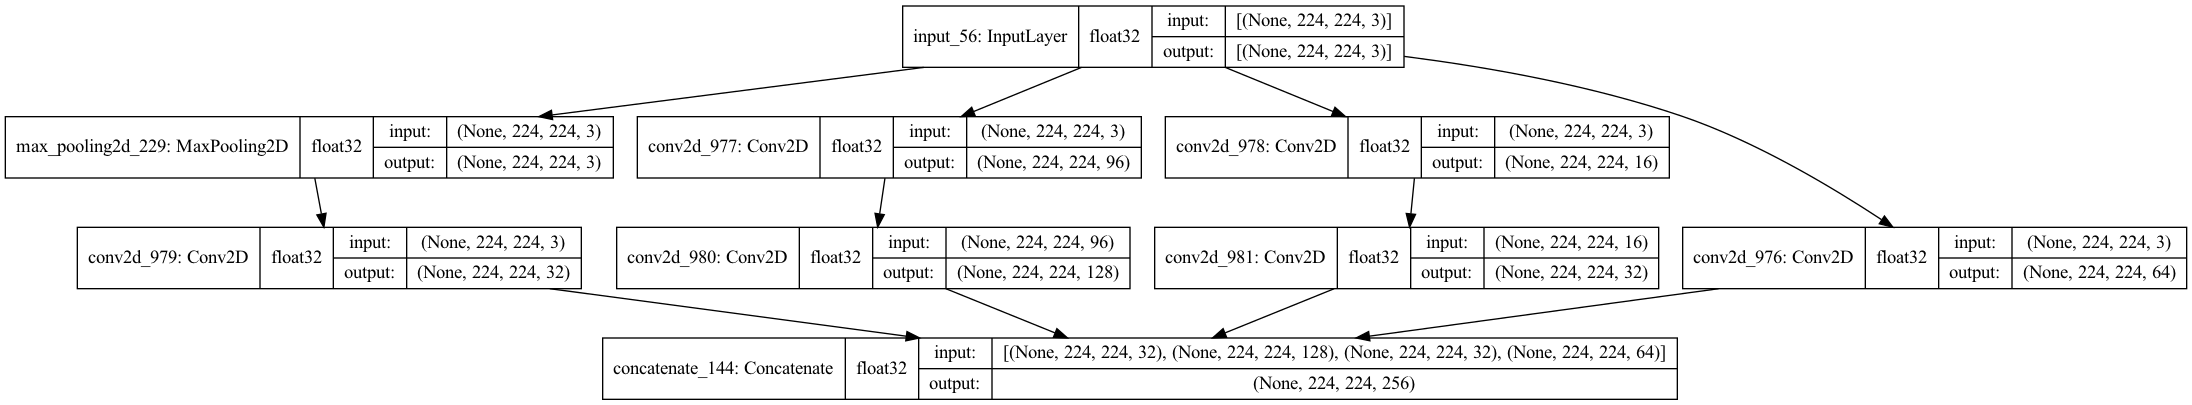

In [176]:
plot_model(inception, 
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96
)

<center>Inception block Recreated

### Output Blocks

In [174]:
def mid_softmax_layers(input):
    x = AveragePooling2D(pool_size=5, strides=3, padding='same')(input)
    x = Conv2D(filters=128, kernel_size=1, strides=1, activation='relu')(x)
    x = Dense(1024)(x)
    x = Dropout(0.7)(x)
    x = Dense(1000, activation='softmax')(x)
    return x

## Final Architecture

In [177]:
input = Input(shape=(224,224, 3))
x = Conv2D(filters=64, strides=2, kernel_size=7, padding='same')(input)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(filters=64, strides=1, kernel_size=1, padding='same')(x)
x = Conv2D(filters=192, strides=1, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
x = inception_module(x, 64,96,16, 128, 32, 32)
x = inception_module(x, 128,128,32, 192, 96, 64)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
x_1 = inception_module(x, 192,96,16, 208, 48, 64)
x = inception_module(x_1, 160,112,24, 224, 64, 64)

step_1 = mid_softmax_layers(x_1)
x = inception_module(x, 128,128,24, 256, 64, 64)
x_1 = inception_module(x, 112,144,32, 288, 64, 64)
step_2 = mid_softmax_layers(x_1)
x = inception_module(x_1, 256,160,32, 320, 128, 128)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
x = inception_module(x, 256,160,32, 320, 128, 128)
x = inception_module(x, 384,192,48, 384, 128,128)
x = AveragePooling2D(pool_size=7, strides=1)(x)

x = Dropout(0.4)(x)
x = Dense(1000)(x)
step_3 = Dense(1000, activation='softmax')(x)

model = Model(input, [step_3, step_1, step_2])

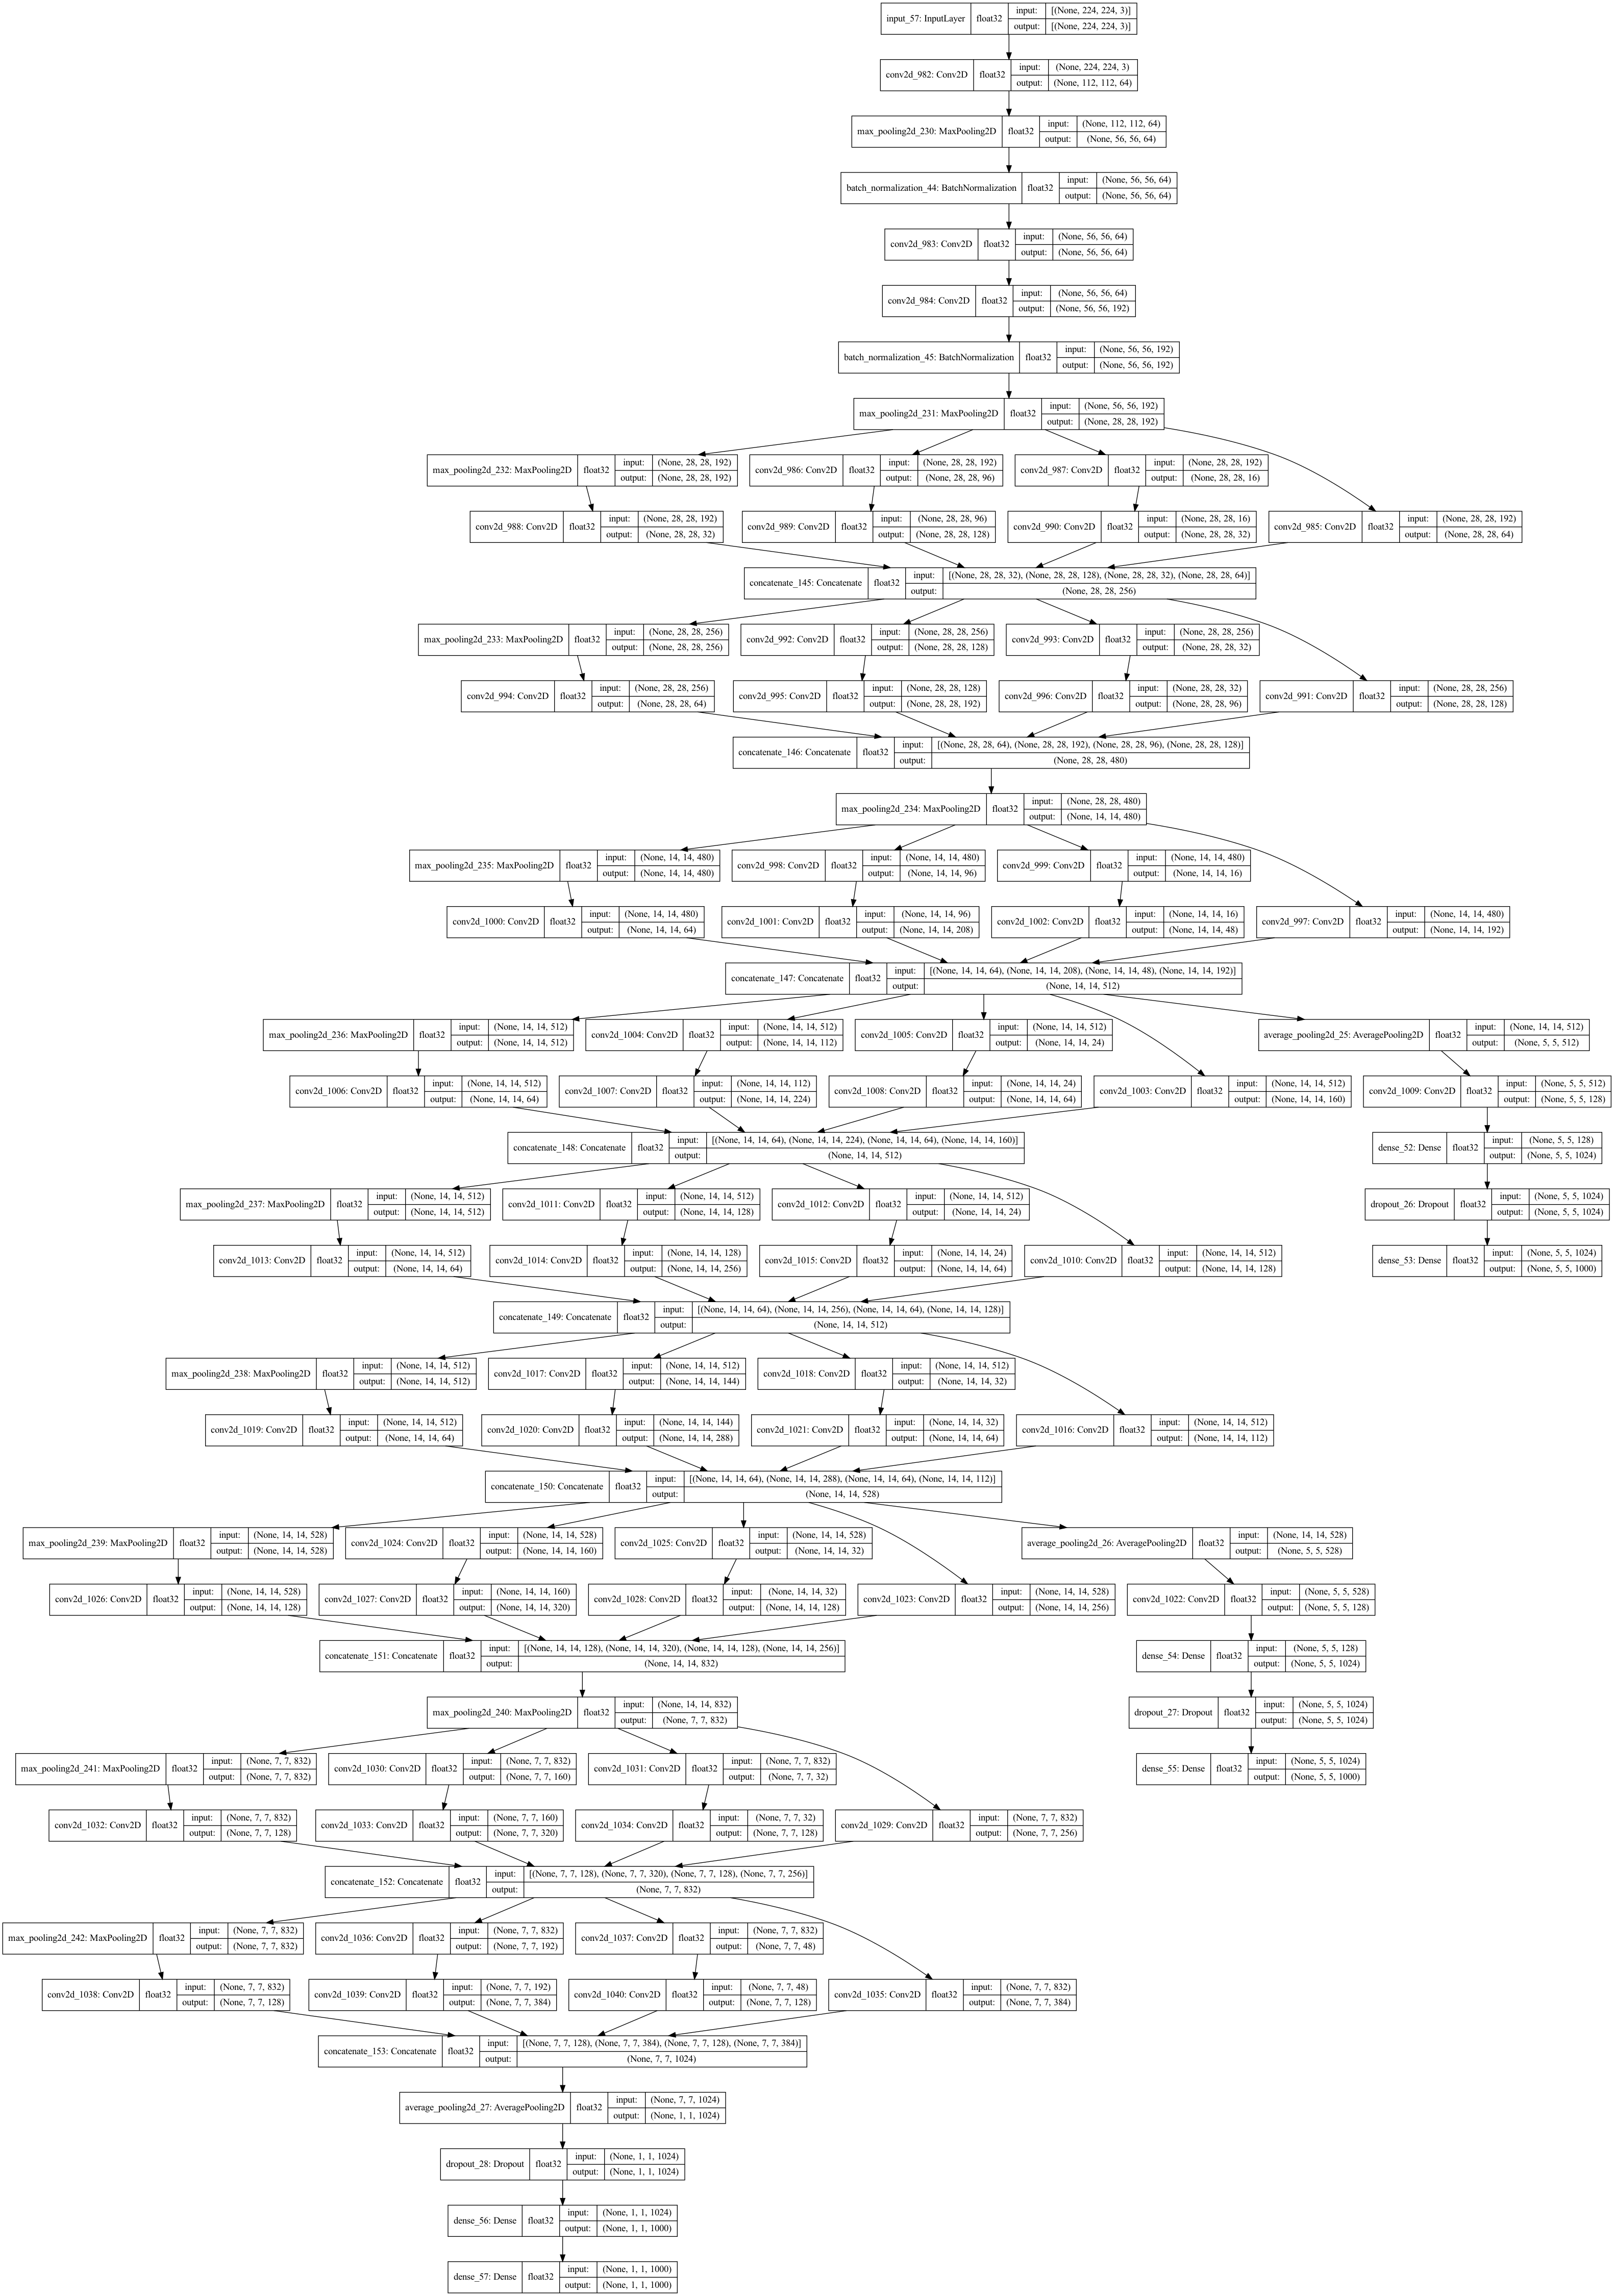

In [178]:
plot_model(model, 
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96
)

In [179]:
model.summary()

Model: "model_43"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_57 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_982 (Conv2D)             (None, 112, 112, 64) 9472        input_57[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_230 (MaxPooling2D (None, 56, 56, 64)   0           conv2d_982[0][0]                 
__________________________________________________________________________________________________
batch_normalization_44 (BatchNo (None, 56, 56, 64)   256         max_pooling2d_230[0][0]          
___________________________________________________________________________________________